In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fb_ads_df = pd.read_csv('/Users/kazak/Downloads/facebook_ads_data (2.0).csv')
print(fb_ads_df)

         ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0     2022-11-05     Expansion         0.00                  0             0   
1     2022-11-01     Expansion         0.00                  0             0   
2     2022-10-31     Expansion       227.45               6054            58   
3     2022-10-30     Expansion       335.91              27562            69   
4     2022-10-29     Expansion       714.03              33358           115   
...          ...           ...          ...                ...           ...   
1489  2020-11-15     Discounts         6.98              12465           657   
1490  2020-11-14     Discounts         7.27               5005           392   
1491  2020-11-13     Discounts         6.36              11669           451   
1492  2020-11-12     Discounts        23.00              10473           397   
1493  2020-11-11     Discounts         1.89               1800            45   

      total_value   cpc    cpm       ct

In [3]:
# Checking and converting the 'total_spend' and 'total_value' columns to float
fb_ads_df['total_spend'] = pd.to_numeric(fb_ads_df['total_spend'], errors='coerce')
fb_ads_df['total_value'] = pd.to_numeric(fb_ads_df['total_value'], errors='coerce')

# Removing rows with missing 'total_spend' and 'total_value' values from the table
fb_ads_df = fb_ads_df.dropna(subset=['total_spend', 'total_value'])

# Keeping rows with non-zero 'total_spend' values
fb_ads_df = fb_ads_df[fb_ads_df['total_spend'] != 0]
print(fb_ads_df)

         ad_date campaign_name  total_spend  total_impressions  total_clicks  \
2     2022-10-31     Expansion       227.45               6054            58   
3     2022-10-30     Expansion       335.91              27562            69   
4     2022-10-29     Expansion       714.03              33358           115   
5     2022-10-28     Expansion       630.33               5522           121   
6     2022-10-27     Expansion       359.63              45223            87   
...          ...           ...          ...                ...           ...   
1489  2020-11-15     Discounts         6.98              12465           657   
1490  2020-11-14     Discounts         7.27               5005           392   
1491  2020-11-13     Discounts         6.36              11669           451   
1492  2020-11-12     Discounts        23.00              10473           397   
1493  2020-11-11     Discounts         1.89               1800            45   

      total_value   cpc     cpm       c

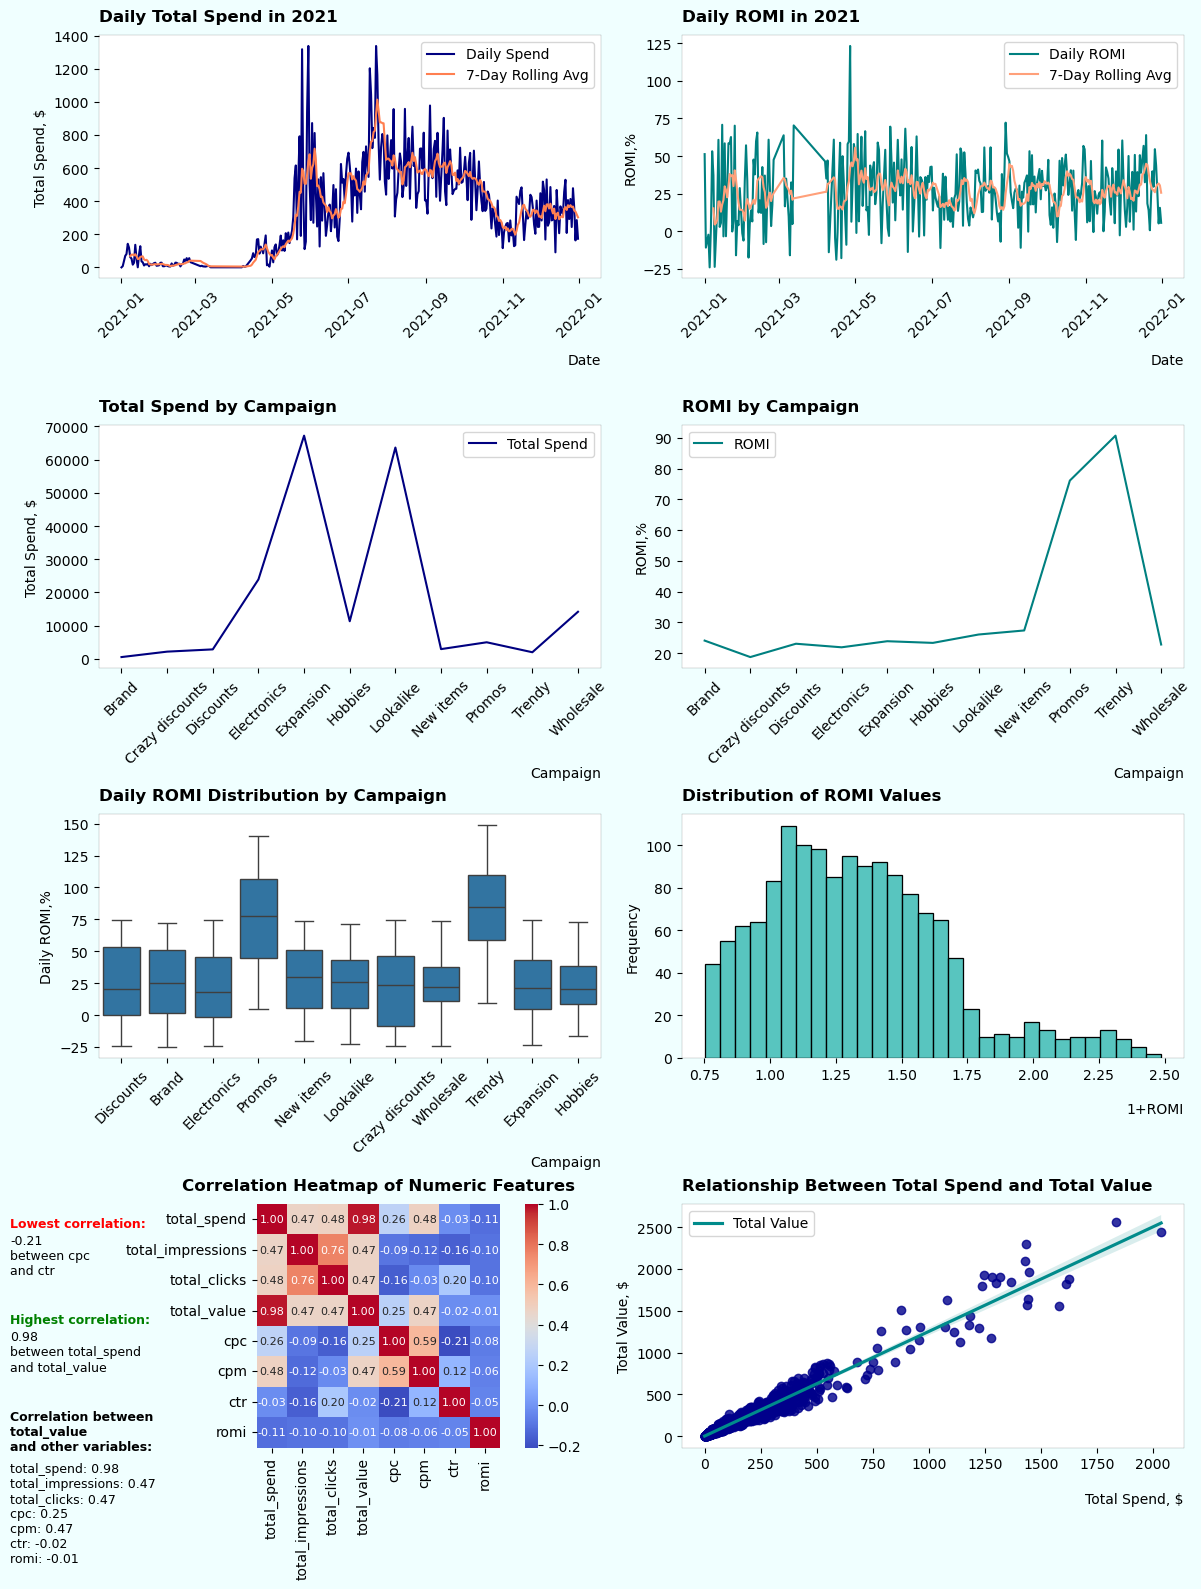

In [4]:
# Grouping data by day and building two charts for 2021:

# Filtering dates that contain '2021'
fb_ads_2021_df = fb_ads_df[fb_ads_df['ad_date'].str.contains('2021')]

# Grouping by 'ad_date' and calculating total spend and ROMI
grouped_data = fb_ads_2021_df.groupby('ad_date', as_index=False).agg({
    'total_spend': 'sum',
    'total_value': 'sum'
})
# Calculating daily ROMI
grouped_data['romi'] = (grouped_data['total_value'] - grouped_data['total_spend']) / grouped_data['total_spend'] * 100

# Converting 'ad_date' to datetime type
grouped_data['ad_date'] = pd.to_datetime(grouped_data['ad_date'])

# Adding a 7-day rolling average for spend and ROMI
grouped_data['total_spend_rolling'] = grouped_data['total_spend'].rolling(window=7).mean()
grouped_data['romi_rolling'] = grouped_data['romi'].rolling(window=7).mean()

# Creating a dashboard to display all visualizations: 
fig, axes = plt.subplots(4, 2, figsize=(12, 16), facecolor='#F0FFFF')  # 4 рядки, 2 колонки

# 1.1. Line chart of daily ad spend in 2021.
sns.lineplot(x='ad_date', y='total_spend', data=grouped_data, label='Daily Spend', color='navy', ax=axes[0, 0])
sns.lineplot(x='ad_date', y='total_spend_rolling', data=grouped_data, label='7-Day Rolling Avg', color='#FF7F50', ax=axes[0, 0])
axes[0, 0].set_title('Daily Total Spend in 2021', fontweight='bold', loc='left', pad=10)
axes[0, 0].set_xlabel('Date',loc='right', labelpad=10)
axes[0, 0].set_ylabel('Total Spend, $')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 1.2. Line chart of daily ROMI in 2021.
sns.lineplot(x='ad_date', y='romi', data=grouped_data, label='Daily ROMI', color='#008080', ax=axes[0, 1])
sns.lineplot(x='ad_date', y='romi_rolling', data=grouped_data, label='7-Day Rolling Avg', color='#FFA07A', ax=axes[0, 1])
axes[0, 1].set_title('Daily ROMI in 2021', fontweight='bold', loc='left', pad=10)
axes[0, 1].set_xlabel('Date',loc='right', labelpad=10)
axes[0, 1].set_ylabel('ROMI,%')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# 2. Grouping by 'campaign_name' and calculating total spend and ROMI
grouped_campaigns = fb_ads_df.groupby('campaign_name', as_index=False).agg({
    'total_spend': 'sum',
    'total_value': 'sum'
})
# Calculating total ROMI for each campaign
grouped_campaigns['romi'] = (grouped_campaigns['total_value'] - grouped_campaigns['total_spend']) / grouped_campaigns['total_spend'] * 100

# 2.1. Chart of total ad spend for each campaign
sns.lineplot(x='campaign_name', y='total_spend',data=grouped_campaigns, label='Total Spend', color='navy', ax=axes[1, 0])
axes[1, 0].set_title('Total Spend by Campaign', fontweight='bold', loc='left', pad=10)
axes[1, 0].set_xlabel('Campaign',loc='right', labelpad=0)
axes[1, 0].set_ylabel('Total Spend, $')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# 2.2. Chart of ROMI for each campaign
sns.lineplot(x='campaign_name', y='romi', data=grouped_campaigns, label='ROMI', color='#008080', ax=axes[1, 1])
axes[1, 1].set_title('ROMI by Campaign', fontweight='bold', loc='left', pad=10)
axes[1, 1].set_xlabel('Campaign',loc='right', labelpad=0)
axes[1, 1].set_ylabel('ROMI,%')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

# 3. Box plot to determine the spread of daily ROMI in each campaign.
# Grouping data by date and campaign to calculate daily ROMI
daily_romi = fb_ads_df.groupby(['ad_date', 'campaign_name'], as_index=False).agg({
    'total_spend': 'sum',
    'total_value': 'sum'
})
# Calculating daily ROMI
daily_romi['romi'] = (daily_romi['total_value'] - daily_romi['total_spend']) / daily_romi['total_spend'] * 100

# Creating a Box plot
sns.boxplot(data=daily_romi, x='campaign_name', y='romi', ax=axes[2, 0])
axes[2, 0].set_title('Daily ROMI Distribution by Campaign', fontweight='bold', loc='left', pad=10)
axes[2, 0].set_xlabel('Campaign',loc='right', labelpad=0)
axes[2, 0].set_ylabel('Daily ROMI,%')
axes[2, 0].tick_params(axis='x', rotation=45) 

# 4. Histogram of ROMI distribution from the file facebook_ads_data.csv (the 'romi' column actually shows the value 1+ROMI)
sns.histplot(fb_ads_df['romi'].dropna(), bins=30, color='#20B2AA', edgecolor='black', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of ROMI Values', fontweight='bold', loc='left', pad=10)
axes[2, 1].set_xlabel('1+ROMI',loc='right', labelpad=15)
axes[2, 1].set_ylabel('Frequency')

# 5. Heatmap of correlation between all numerical indicators in the facebook_ads_data.csv table
numeric_df = fb_ads_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True, annot_kws={"size": 8}, ax=axes[3, 0])
axes[3, 0].set_title('Correlation Heatmap of Numeric Features', fontweight='bold', pad=10)

# Identifying the highest and lowest correlation
# Creating an array of unique correlations, excluding 1 (self-correlation)
correlation_values = correlation_matrix.values
mask = np.eye(correlation_values.shape[0], dtype=bool)  # Маска для самоцінності

# Ignoring self-values
correlation_values[mask] = np.nan

# Highest correlation
highest_correlation_value = np.nanmax(correlation_values)  # Не враховую одиницю
highest_correlation_index = np.unravel_index(np.nanargmax(correlation_values), correlation_values.shape)

# Lowest correlation
lowest_correlation_value = np.nanmin(correlation_values)  # Не враховую одиницю
lowest_correlation_index = np.unravel_index(np.nanargmin(correlation_values), correlation_values.shape)

highest_correlation_features = (correlation_matrix.index[highest_correlation_index[0]], 
                                 correlation_matrix.columns[highest_correlation_index[1]])
lowest_correlation_features = (correlation_matrix.index[lowest_correlation_index[0]], 
                                correlation_matrix.columns[lowest_correlation_index[1]])
# Displaying the results
fig.text(0.00, 0.16,'Highest correlation:\n', fontsize=9, ha='left', color='green', weight='bold')
fig.text(0.00, 0.14,f'{highest_correlation_value:.2f}\nbetween {highest_correlation_features[0]}\nand {highest_correlation_features[1]}', fontsize=9, ha='left')
fig.text(0.00, 0.22,'Lowest correlation:\n', fontsize=9, ha='left', color='red', weight='bold')
fig.text(0.00, 0.20,f'{lowest_correlation_value:.2f}\nbetween {lowest_correlation_features[0]}\nand {lowest_correlation_features[1]}', fontsize=9, ha='left')

# Calculating correlations for 'total_value' with other indicators
total_value_correlations = correlation_matrix['total_value'].drop('total_value')  # Виключаю саму змінну

total_value_text = '\n'.join([f'{index}: {value:.2f}' for index, value in total_value_correlations.items()])
fig.text(0.00, 0.09,'Correlation between\ntotal_value \nand other variables:', fontsize=9, ha='left', color='black', weight='bold')
fig.text(0.00, 0.02, total_value_text, fontsize=9, ha='left')

# 6. Scatter plot with linear regression (lmplot) to visualize the relationship between "total_spend" and "total_value".
fb_ads_df.dropna(subset=['total_spend', 'total_value'], inplace=True)
sns.regplot(x='total_spend', y='total_value', data=fb_ads_df, scatter_kws={'color': '#00008B','label': 'Total Spend'}, line_kws={'color': '#008B8B','label': 'Total Value'}, ax=axes[3, 1])
axes[3, 1].set_title('Relationship Between Total Spend and Total Value', fontweight='bold', loc='left', pad=10)
axes[3, 1].set_xlabel('Total Spend, $',loc='right', labelpad=15)
axes[3, 1].set_ylabel('Total Value, $')
axes[3, 1].legend()

# Adjusting the bounds of all charts:
for ax_row in axes:  
    for ax in ax_row:  
        for spine in ax.spines.values():  
            spine.set_linewidth(0.1)

# Applying Arial font to all visualizations
plt.rcParams['font.family'] = 'Arial' 

# Adjusting margins
plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()
